# ¡Hola, Yair!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Incluye una breve descripción de tu proyecto.
</div>

en esta parte del proyecto voy a hacer un analisis de los csv's que obtuve de las consultas de los 3 pasos anteriores, dando una mejor visualizacion por medio de graficos de barras y posteriormente realizar una prueba de hipotesis

# Paso 4. Análisis exploratorio de datos (Python)

## importar los archivos

In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
#importar los archivos
company_amount =  pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_avarage = pd.read_csv('/datasets/project_sql_result_04.csv')
loop_ohare =      pd.read_csv('/datasets/project_sql_result_07.csv')

## estudiar los datos que contienen

In [3]:
#informacion de company_amount
print(company_amount.info())
#informacion de dropoff_avarage
print(dropoff_avarage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


## identificar los 10 principales barrios en términos de finalización del recorrido

In [18]:
top_10_finalizacion = dropoff_avarage.sort_values(ascending=True, by='average_trips').tail(10)

top_10_finalizacion


,dropoff_location_name,average_trips
9,Sheffield & DePaul,1259.766667
8,Gold Coast,1364.233333
7,Museum Campus,1510.000000
6,Grant Park,2068.533333
5,Lake View,2420.966667
4,O'Hare,2546.900000
3,West Loop,5163.666667
2,Streeterville,6664.666667
1,River North,9523.666667
0,Loop,10727.466667


## hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

company_name
Blue Ribbon Taxi Association Inc.     5953
Star North Management LLC             7455
Sun Taxi                              7701
City Service                          8448
Chicago Carriage Cab Corp             9181
Taxi Affiliation Service Yellow       9299
Yellow Cab                            9888
Medallion Leasing                    10367
Taxi Affiliation Services            11422
Flash Cab                            19558
other                                38039
Name: trips_amount, dtype: int64


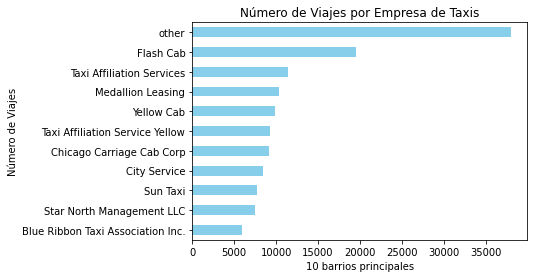

In [21]:
#funcion para agrupar other 
def plot_top_n_companies(df, n=10):
    #agrupar las 10 mejores empresas
    total_trips= company_amount.groupby('company_name')['trips_amount'].sum()
    top_n_companies = company_amount.groupby('company_name')['trips_amount'].sum().nlargest(n)
    #agrupar las otras empresas en other
    other = total_trips[~total_trips.index.isin(top_n_companies.index)]
    other_sum = other.sum()
    top_n_companies = top_n_companies.sort_values()
    top_n_companies["other"] =other_sum
    
    print(top_n_companies)
    # Crear un gráfico de barras
    top_n_companies.plot(kind='barh', color='skyblue')

    # Configurar el título y etiquetas
    
    plt.title('Número de Viajes por Empresa de Taxis')
    plt.xlabel('10 barrios principales')
    plt.ylabel('Número de Viajes')
    # Mostrar el gráfico
    plt.show()
plot_top_n_companies(company_amount,10)

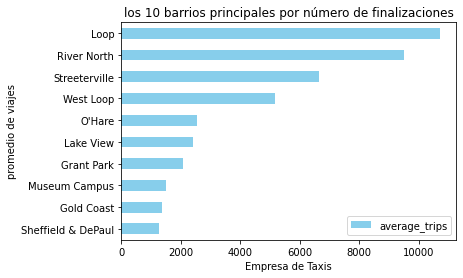

In [19]:
top_10_finalizacion.plot(kind='barh', color='skyblue',x='dropoff_location_name',y='average_trips')

plt.title('los 10 barrios principales por número de finalizaciones')

plt.xlabel('Empresa de Taxis')
plt.ylabel('promedio de viajes')
    # Mostrar el gráfico
plt.show()

## sacar conclusiones basadas en cada gráfico y explicar los resultados

en el primer grafico que representa el numero de viajes por empresa  el 15 y 16 de noviembre de 2017 y se ve graficamente flash cab y taxi afilliation services son los que mas viajes hicieron esas fechas y al final vemos una barra de que representa a 54 empresas de taxis y sus viajes

en el segundo grafico se ve los 10 barrios principales que fueron destinos siendo el ba

# Paso 5. Prueba de hipótesis (Python)

hipotesis nula :La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos
hipotesis alternativa: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

In [7]:
normal_day = loop_ohare['weather_conditions'] == 'Good'
rain_day = loop_ohare['weather_conditions'] == 'Bad'
alpha = 0.05# tu código: establece un nivel crítico de significación estadística

results = st.ttest_ind(normal_day,rain_day,equal_var=False)# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:',results.pvalue) # tu código: imprime el valor p obtenido)

if results.pvalue<alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.4959805706438041e-270
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta prueba de hipótesis.
</div>

en conclusion de la prueba de hipotesis de dos colas rechazamos la hipotesis que dice la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Yair. Nos quedana algunos detalles pendientes por solucionar. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>